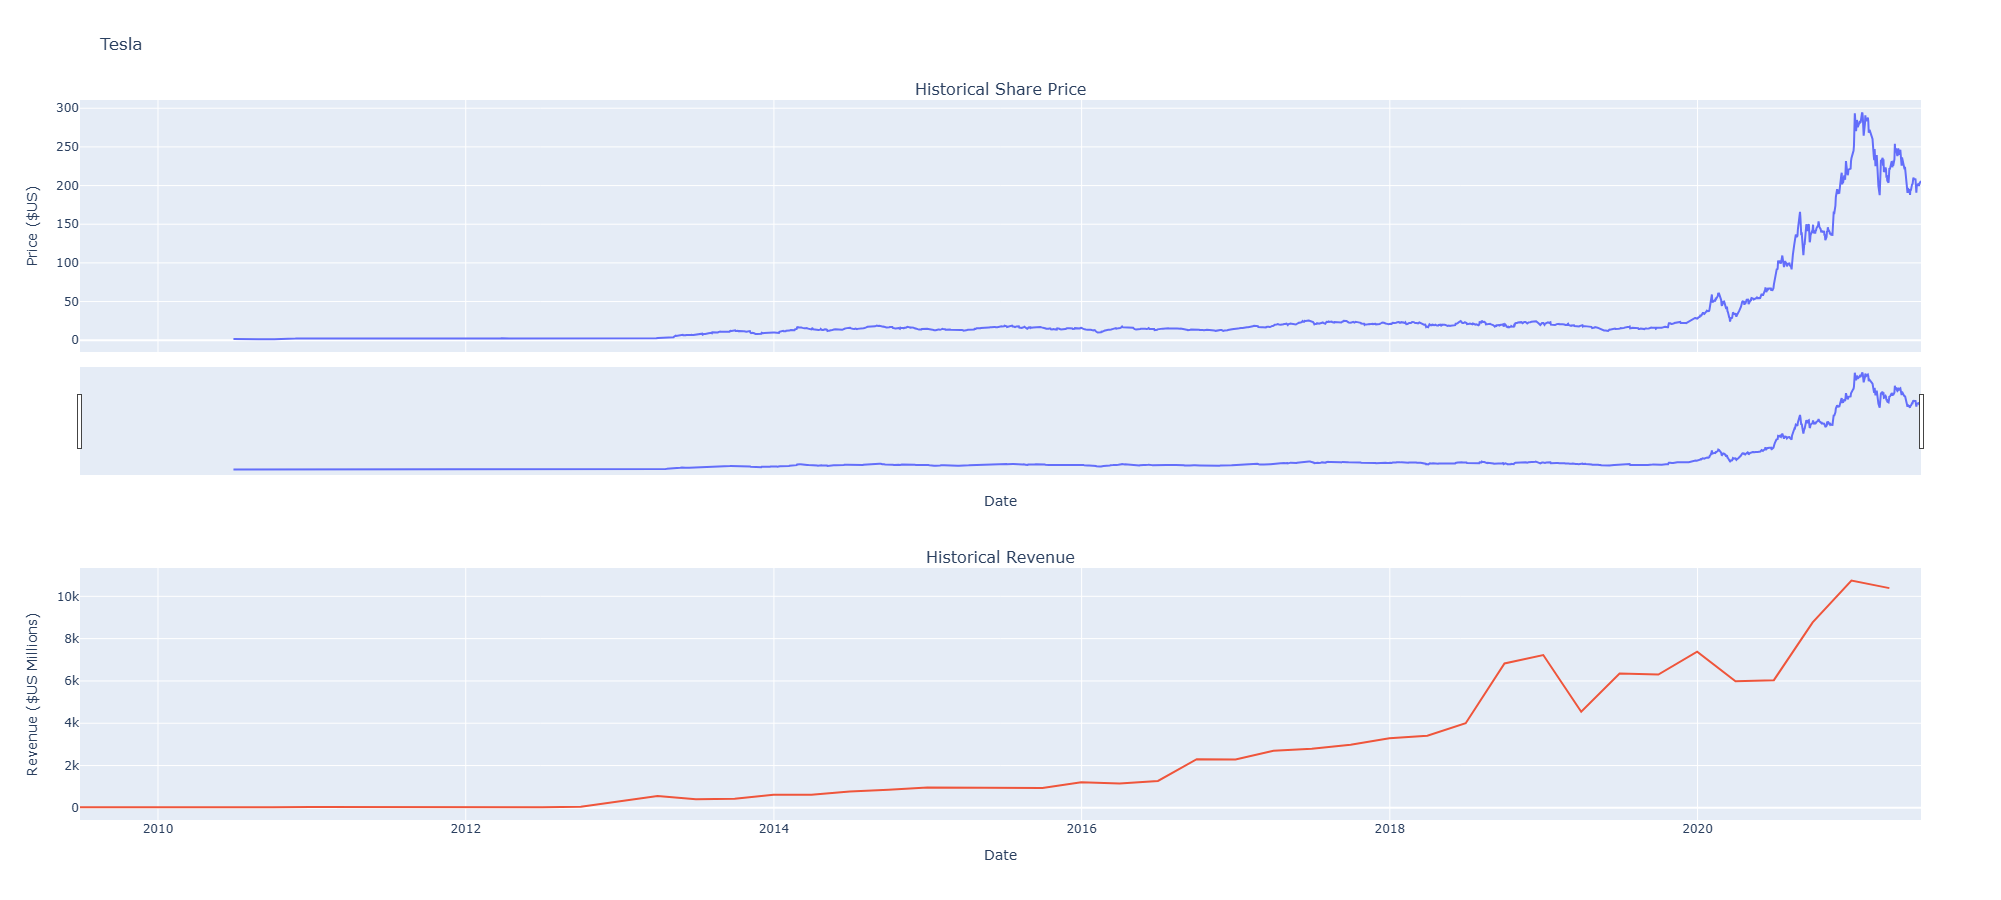

In [53]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

tesla = yf.Ticker("TSLA");
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
tables = soup.find_all('table')
for table in tables:
    if 'Tesla Quarterly Revenue' in str(table):
        relevant_table = table
        break
import pandas as pd
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
rows = relevant_table.find_all('tr')
rows_list=[]
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        temp_df = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        rows_list.append(temp_df)
        tesla_revenue = pd.concat(rows_list, ignore_index=True)

tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
#print(tesla_revenue.tail())
#print(tesla_revenue.head())
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '')  # Entferne Kommas
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '')  # Entferne Dollarzeichen
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')  # Konvertiere in float und setze ungültige Werte auf NaN
tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])  # Entferne Zeilen mit NaN in "Revenue"

make_graph(tesla_data, tesla_revenue, 'Tesla')

import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")
gme_data.reset_index(inplace=True)
#print(gme_data.head())  # Zeigt die ersten 5 Zeilen an
#print(gme_data.tail())

#gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '')  # Entferne Kommas
#gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '')  # Entferne Dollarzeichen
#gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')  # Konvertiere in float und setze ungültige Werte auf NaN
#gme_revenue = gme_revenue.dropna(subset=['Revenue'])  # Entferne Zeilen mit NaN in "Revenue"

#make_graph(gme_data, gme_revenue, 'GameStop')

